You want to schedule a list of jobs in d days. Jobs are dependent (i.e To work on the ith job, you have to finish all the jobs j where 0 <= j < i).

You have to finish at least one task every day. The difficulty of a job schedule is the sum of difficulties of each day of the d days. The difficulty of a day is the maximum difficulty of a job done on that day.

You are given an integer array jobDifficulty and an integer d. The difficulty of the ith job is jobDifficulty[i].

Return the minimum difficulty of a job schedule. If you cannot find a schedule for the jobs return -1.

 

Example 1:

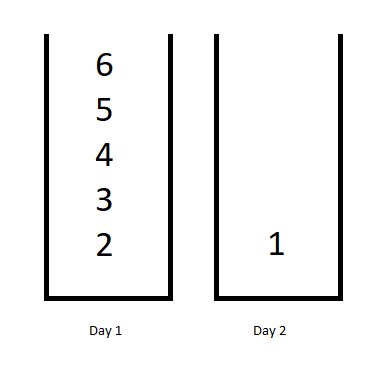

Input: jobDifficulty = [6,5,4,3,2,1], d = 2
Output: 7
Explanation: First day you can finish the first 5 jobs, total difficulty = 6.
Second day you can finish the last job, total difficulty = 1.
The difficulty of the schedule = 6 + 1 = 7 

Example 2:

Input: jobDifficulty = [9,9,9], d = 4
Output: -1
Explanation: If you finish a job per day you will still have a free day. you cannot find a schedule for the given jobs.

Example 3:

Input: jobDifficulty = [1,1,1], d = 3
Output: 3
Explanation: The schedule is one job per day. total difficulty will be 3.

 

Constraints:

    1 <= jobDifficulty.length <= 300
    0 <= jobDifficulty[i] <= 1000
    1 <= d <= 10



In [ ]:
class Solution:
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:
        n = len(jobDifficulty)
    
        @cache
        # dp(i, k): min difficulty when you start working on i-th job at day `k`
        def dp(i, k):
            # reach the last day
            # we put all the remaining jobs on this day
            # so we return the one with max difficulty
            if k == d: 
                return max(jobDifficulty[i:])
            # init min difficulty with inf 
            res = float('inf')
            # cur is the max difficulty we've seen so far on day `k`
            # init current max with 0
            cur = 0
            # for jobDifficulty like 6 5 4 3 2 1, 
            # we can have following ways to distribute them into two days
            # 6 | 5 4 3 2 1
            # 6 5 | 4 3 2 1 
            # 6 5 4 | 3 2 1
            # 6 5 4 3 | 2 1
            # 6 5 4 3 2 | 1
            # notice that each day we must have at least one task
            # given the starting index `i`, 
            # we can only at most choose the jobs till the position `n - d + k - 1`
            for j in range(i, n - d + k):
                cur = max(cur, jobDifficulty[j])
                # if j-th job is the last job on day `k`, 
                # the max difficulty for day `k` is `cur`
                # and we need to start (j + 1)-th job on the next day
                # the result would be `cur + dp(j + 1, k + 1)`
                # then we take the min
                res = min(res, cur + dp(j + 1, k + 1))
            return res
        # n < d : you will have free days. hence you cannot find a schedule for the given jobs
        # e.g. Example 2
        # otherwise, we start working on 0-th job at day 1
        return -1 if n < d else dp(0, 1)

In [ ]:
class Solution:
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:
        
        @lru_cache(None)
        def dp(idx,d,curr):
            if idx == len(jobDifficulty) and d == 0: return curr
            if idx >= len(jobDifficulty) or  d <= 0: return inf
            
            return min(dp(idx+1,d,max(curr,jobDifficulty[idx])),
                       max(curr,jobDifficulty[idx])+dp(idx+1,d-1,0))
       
        ans = dp(0,d,0)

        return ans if ans != inf else -1